# Décomposition dans la base de Haar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import signalfip as sig
from scipy.io import wavfile
from IPython.display import Audio, Markdown, display

In [2]:
# Taille des signaux
N = 16
M = np.sqrt(N)
n = np.arange(N)

## Signaux de la base de Haar

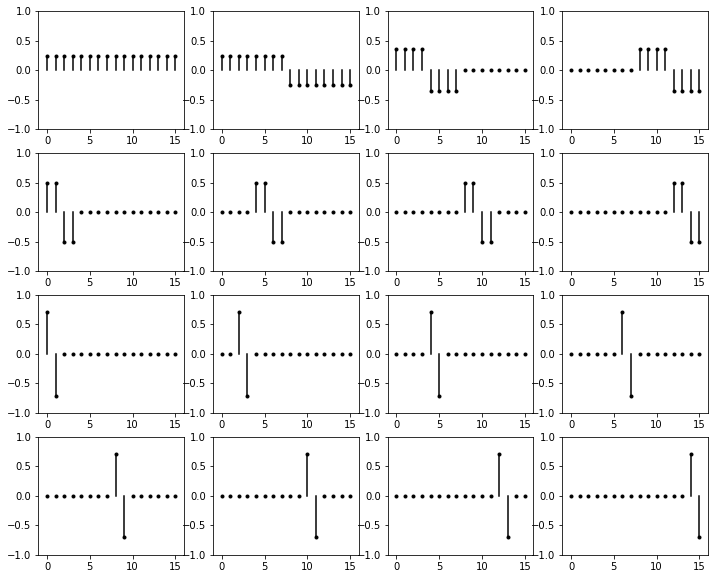

In [3]:
hh = sig.haar(N)
fig = plt.figure(figsize=(12, 10))
i = 0
for h in hh:
    i += 1
    plt.subplot(M, M, i)
    sig.stem(n, h, "k")
    plt.axis([-1, N, -1, 1])
plt.show()

## Signal aléatoire

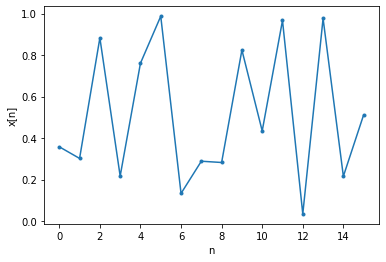

In [4]:
# Signal x
x = np.random.random(N)

# Affichage
plt.figure()
plt.plot(n, x, ".-")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

## Décomposition dans la base de Haar

Coefficients dans la base de Haar :
[ 2.04270889 -0.07942035 -0.14499398  0.271734   -0.21976408  0.66311947
 -0.147215    0.1414289   0.03957977  0.47086818 -0.1600818  -0.10975862
 -0.38319347 -0.37635117 -0.66605299 -0.20952895]



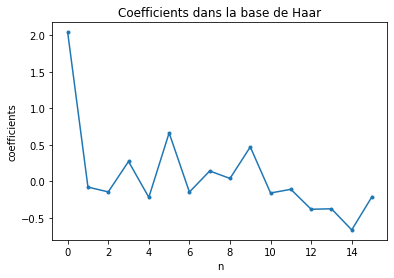

In [5]:
# Compression dans la base de Haar
b = sig.haar(N)
c = np.zeros(N)
for i in range(N):
    c[i] = np.dot(x, b[i])

print("Coefficients dans la base de Haar :")
print(c)
print()

# Affichage
plt.figure()
plt.plot(n, c, ".-")
plt.xlabel('n')
plt.ylabel('coefficients')
plt.title('Coefficients dans la base de Haar')
plt.show()

##  ... et reconstruction dans la base canonique

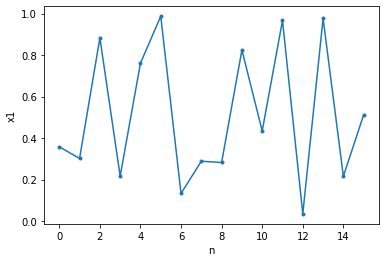

In [6]:
# Reconstruction dans la base canonique
x2 = np.zeros(N)
for i in range (N):
    x2 += c[i] * b[i]

# Affichage
plt.figure()
plt.plot(n, x2, ".-")
plt.xlabel('n')
plt.ylabel('x1')
plt.show()

## Comparaison des deux méthodes de compression 

In [7]:
# Compression dans la base canonique
x1 = x.copy()
x1[int(N/2):] = 0

# Compression dans la base de Haar & reconstruction
c2 = c.copy()
c2[int(N/2):] = 0
x2 = np.zeros(N)
for i in range (N):
    x2 += c2[i] * b[i]

# EQM
eqm1 = np.linalg.norm(x-x1)
eqm2 = np.linalg.norm(x-x2)

La première méthode de compression consiste simplement à annuler les N/2 derniers échantillons de $x$ :

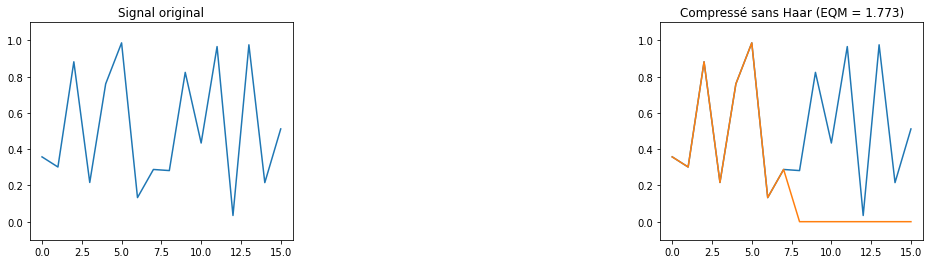

In [8]:
plt.figure(figsize=(16,4))

# Signal initial
plt.subplot(1,3,1)
plt.plot(n, x, "tab:blue")
plt.ylim([-.1, 1.1])
plt.title("Signal original")

# Signal compressé
plt.subplot(1,3,3)
plt.plot(n, x, "tab:blue")
plt.plot(n, x1, "tab:orange")
plt.ylim([-.1, 1.1])
plt.title(f"Compressé sans Haar (EQM = {eqm1:.3f})")

plt.show()

La seconde méthode de compression décompose d'abord le signal dans la base de Haar, puis annule les N/2 derniers coefficients obtenus, et enfin reconstruit le signal dans la base canonique :

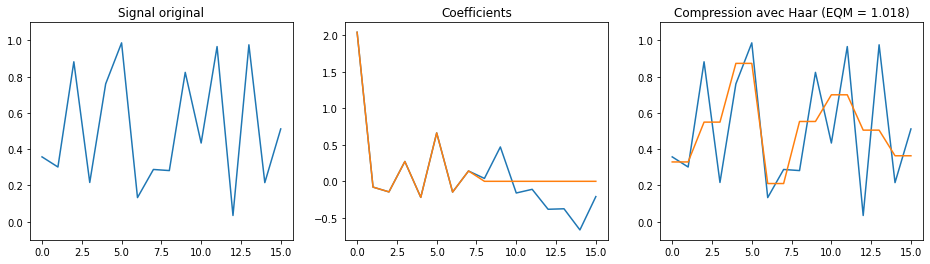

In [9]:
plt.figure(figsize=(16,4))

# Signal initial
plt.subplot(1,3,1)
plt.plot(n, x, "tab:blue")
plt.ylim([-.1, 1.1])
plt.title("Signal original")

# Coefficients dans la base de Haar
plt.subplot(1,3,2)
plt.plot(n, c, "tab:blue")
plt.plot(n, c2, "tab:orange")
plt.title("Coefficients")

# Signal compressé
plt.subplot(1,3,3)
plt.plot(n, x, "tab:blue")
plt.plot(n, x2, "tab:orange")
plt.ylim([-.1, 1.1])
plt.title(f"Compression avec Haar (EQM = {eqm2:.3f})")

plt.show()

## Application à un véritable signal audio

In [10]:
# Chargement de la musique
fe, mus = wavfile.read("Elise.wav")

# Ne conserve que le début
M = 2**18
mus = mus[0:M]              # Musique originale
mu1 = np.zeros(mus.shape)   # Musique compressée dans la base canonique
mu2 = np.zeros(mus.shape)   # Musique compressée dans la base de Haar

# Paramètres
N = 16         # Nombre de points par morceau
L = 8          # Nombre de points conservés
K = int(M/N)   # Nombre de morceaux

# Vecteurs de la base et des coefficients
b = sig.haar(N)
c = np.zeros(N)

for k in range(K):

    # Morceau du signal de N échantillons
    idx = range( (k*N-N), k*N)
    x = mus[idx]

    # Compression dans la base canonique
    x1 = x.copy()
    x1[L:] = 0
    mu1[idx] = x1

    # Compression dans la base de Haar
    for i in range(N):
        c[i] = np.dot(x, b[i])
    c[L:] = 0
    x2 = np.zeros(N)
    for i in range(N):
        x2 += c[i] * b[i]
    mu2[idx] = x2

Musique originale :

In [11]:
display(Audio(mus, rate=fe))

Compression dans la base canonique :

In [12]:
display(Audio(mu1, rate=fe))

Compression dans la base de Haar :

In [13]:
display(Audio(mu2, rate=fe))